In [ ]:
%matplotlib inline
%load_ext autoreload 
%autoreload 2
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt


Linearizing a non linear equation, since to use KF with non linear equation we first need to linearize them, here f(x)=x^2−2x is our non linear function and we can find the linear approximation of this function and then try ekf on that. As we know the current state x for the function, so if we'll linearize function on taht value we'll get a good linear approximation of non linear function. So suppose if current value is 1.5, we need to find a linear equation that passes thought curve of non linear function between at (1.5,-0.75). One such function can be f(x)=8*x - 12.75. The plot bleow provides visual description of this 

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

(-1.5, 1.0)

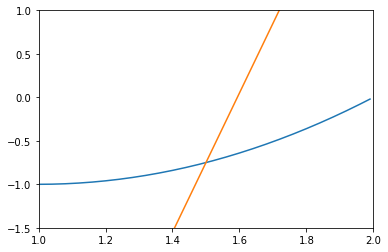

In [ ]:
xs = np.arange(0,2,0.01)
print(xs)
ys = [x**2-2*x for x in xs]

def y(x):
  return 8*x - 12.75

plt.plot(xs,ys)
plt.plot([1.25,1.75],[y(1.25),y(1.75)])
plt.xlim(1,2)
plt.ylim([-1.5,1])

another good approximation can be x-2.25.  Note these are linear equations

(-1.5, 1.0)

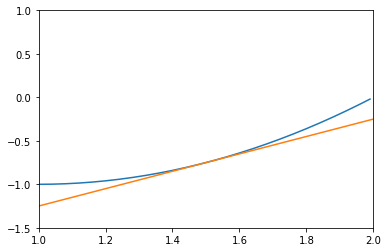

In [ ]:
def y(x):
  return (x)-2.25

plt.plot(xs,ys)
plt.plot([1,2],[y(1),y(2)])
plt.xlim(1,2)
plt.ylim([-1.5,1])

In other words we can linearize an equation by taking derivative of it. So this means for non linear equations, we can take partial derrivative of f() and h() wrt current state to compute system matrix F and measurement matrix H at that state. We can then use taylor series to turn this in to set of lineaer equations. 

**Let's use EKF to track a flying airplane**

Radar is used to detect airplane, it emits beams of raido waves which reflect backs after colliding with coming objects. The time beams takes to get back to radar is used to compute slant, the straight line distance from radar installation to the object.
Here we'll compute horizontal distance and altitude of aircraft using slant distance range from radar to aircraft. I am going to explain metrix involve in prediction and update step of EKF here as well.

xk = state vector of system at time k

Pk = Covariance matrix for states of system at time k, it has same number of rows and coloumns as the number of state in state vector x. The diagonal of this matrix represents varinace(how much a quatity daviates from best value) and off diagonals are covariance (how much one state varries by variation in other states of system). In simple words P tells how accurate our predicted values are.

Fk = is system matrix and tells how states changes from time k-1 to time k. The number of rows and cols are equal to states of system.

Qk= It models state noise covariance matrix. It models How much a predicted state daviates from true value because of measurement noise. The number of rows and cols are equal to number of states. if Q is large it means we trust our observation measurements more than our predicted sensor measurements. Here we have 3 states, position, velocity and altitude. First two states are dependet on eachother while we consider that third state is independent from first two states. We can model covariance noise for first two states using discrete white noise and for last state we can add a constant noise.  So the  Q matrix is 

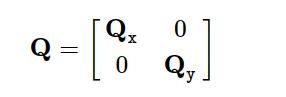

For observation , we need true sensor measurements, lets call this zk,it can be a true pose value coming from sensor.

Hk= it is measurement matrix and models states in form of true measurement coming from sensor. For example if radar gives us slant range as true measurment and our system states are horizontal distance between radar and object , altitude of plane, then H will model this horizonatal distance and altitude to slant. 

On update step we also need to update the covariance matrix of states using predicted covaiance matrix, Measurement matrix and Rk.

Rk=Rk is sensor measurement noise covarinace matrix and has rows and coloumns equal to sensor measurements, in case of radar we only measure slant from sensor so R has 1 row and coloumn.

K= is kalman gain and indicates that how much a predicted state and covarinace matrix should be corrected as a result of new ture measurement value. If sensor measurement noise is large, K is 0 and ture measurement is ignored, while if prediciton noise is large, K is 1 and predicitons are ignored.





Method to find jacobian of non linear h() to convert it to linearize H i.e. measurement matrix. We have three state variable x=[position velocity altitude]

H=[ 

xpos/sqrt(xpos^2 + xalt^2)    #for position

0    #for velocity

xalt/sqrt(xpos^2 + xalt^2) #for altitude 

]


In [ ]:
from numpy.random import randn
from numpy.ma.core import array
def HJacobian_at(x):
  """ compute Jacobian of H matrix for state x """
  horizontal_distance=x[0]
  altitude = x[2]
  deno = sqrt(horizontal_distance**2 + altitude**2)
  return np.array([[horizontal_distance/deno , 0. ,altitude/deno]])


the measurement function needs to convert states to measuremnt coming from radar i.e. slant range distance. using pythagorean theorem slant distance range is 

h(x)= sqrt(xpos^2 + xalt^2)

Lets write **function to calculate h(x)** 

In [ ]:
import math
def compute_h(x):
  #return math.sqrt(x[0]**2 + x[2]**2)
  return (x[0]**2 + x[2]**2) ** 0.5

**Code to create Simulation for radar** 

In [ ]:


class RadarSim(object):
  """Simulates the radar signal returns from object flying at constant
   altitude and velocity in 1D"""
  def __init__(self, dt, pos, vel, alt):
      self.pos=pos
      self.dt=dt
      self.vel=vel
      self.alt=alt
  
  def get_range(self):
    """ returns slant range to an object, call once 
    for each new measurement at dt time from last call"""

    #add some process noise to system
    self.vel=self.vel+0.1*randn()
    self.pos=self.pos+0.1*randn()
    self.alt=self.alt+0.1*randn()
    self.dt=self.dt+0.1*randn()

    #add measurement noide 
    err=self.pos*0.05*randn()
    slant_distance = sqrt(self.pos**2 + self.alt**2)

    return slant_distance+err


    

     

In [ ]:
def plot_track(xs, ys=None, dt=None, label='Track', c='k', lw=2, **kwargs):
    
    if ys is None and dt is not None:
        ys = xs
        xs = np.arange(0, len(ys)*dt, dt)
    if ys is not None:
        return plt.plot(xs, ys, color=c, lw=lw, ls=':', label=label, **kwargs)
    else:
        return plt.plot(xs, color=c, lw=lw, ls=':', label=label, **kwargs)
def plot_filter(xs, ys=None, dt=None, c='C0', label='Filter', var=None, **kwargs):
    """ plot result of KF with color `c`, optionally displaying the variance
    of `xs`. Returns the list of lines generated by plt.plot()"""

    if ys is None and dt is not None:
        ys = xs
        xs = np.arange(0, len(ys) * dt, dt)
    if ys is None:
        ys = xs
        xs = range(len(ys))

    lines = plt.plot(xs, ys, color=c, label=label, **kwargs)
    if var is None:
        return lines


In [ ]:
pip install filterpy

     |████████████████████████████████| 177 kB 7.4 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=da5411590354f71b771a922ef8dc1e56d203dc91081b5a37bdd37356cb335a21
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy


In [ ]:
from filterpy.kalman import ExtendedKalmanFilter 
from filterpy.common import Q_discrete_white_noise
from numpy import eye
rk = ExtendedKalmanFilter(dim_x=3 , dim_z=1)
dt =0.05 
radar = RadarSim(dt , pos=0. , vel=100.,alt=1000. )

rk.x = array([radar.pos-100, radar.vel+100, radar.alt+1000])
print(rk.x)
rk.F = eye(3)+ np.array([[0,1,0],[0,0,0],[0,0,0]])*dt  #check calculation of system matrix from riginal tutorial https://cocalc.com/share/public_paths/7557a5ac1c870f1ec8f01271959b16b49df9d087/11-Extended-Kalman-Filters.ipynb



[-100.  200. 2000.]


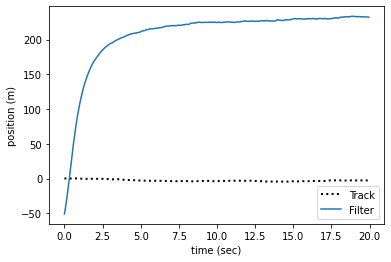

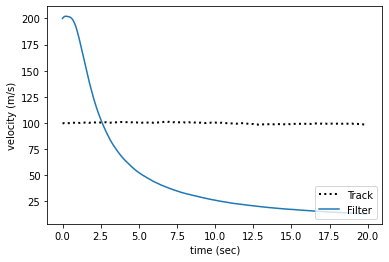

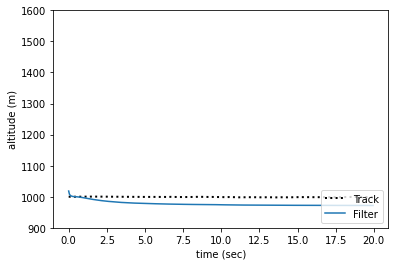

In [ ]:
range_std=5
rk.Q[0:2,0:2]= Q_discrete_white_noise(2, dt=dt, var=0.1)
rk.Q[2,2]=0.1

rk.R = radar.alt* 0.001

rk.P *=50
xs=[]
track=[]

for i in range(int(20/dt)):
  z= radar.get_range() 
  rk.update(array([z]), HJacobian_at, compute_h)
  track.append((radar.pos, radar.vel, radar.alt))
  xs.append(rk.x)
  rk.predict()
xs = np.asarray(xs)
track = np.asarray(track)
time = np.arange(0, len(xs)*dt, dt)

plt.figure()
plot_track(time, track[:, 0])

plot_filter(time, xs[:, 0])
plt.legend(loc=4)
plt.xlabel('time (sec)')
plt.ylabel('position (m)')

plt.figure()
plot_track(time, track[:, 1])
plot_filter(time, xs[:, 1])
plt.legend(loc=4)
plt.xlabel('time (sec)')
plt.ylabel('velocity (m/s)')

plt.figure()
plot_track(time, track[:, 2])
plot_filter(time, xs[:, 2])
plt.ylabel('altitude (m)')
plt.legend(loc=4)
plt.xlabel('time (sec)')
plt.ylim((900, 1600))
plt.show()

**Calculation of Jacobian using SymPy**

Instead of writing our own functions to compute jacobians to make h() linear H, we can use SymPy as well to compute Jacobians with less effort.


In [ ]:
import sympy
from IPython.display import display
sympy.init_printing(use_latex='mathjax')

x, x_vel, y = sympy.symbols('x, x_vel y')

H = sympy.Matrix([sympy.sqrt(x**2 + y**2)])

state = sympy.Matrix([x, x_vel, y])
J = H.jacobian(state)

display(state)
display(J)


⎡ x  ⎤
⎢    ⎥
⎢xᵥₑₗ⎥
⎢    ⎥
⎣ y  ⎦

⎡     x                y      ⎤
⎢────────────  0  ────────────⎥
⎢   _________        _________⎥
⎢  ╱  2    2        ╱  2    2 ⎥
⎣╲╱  x  + y       ╲╱  x  + y  ⎦

**Robot Localization**

Above we created a simulation for radar and predicted the states of system, now we are going to implement EKF on more intresting problem .i.e. Robot localization. This means our filter will now predict and estimate the exact location of our robot oin remote terrain. Lets say its a 4 wheel robot and our roboot can pivot around real axis whihc is non linear behaviour.

The robot has sensors that measures bearings and range to know objects in landscape. We are going to compute position from the range and bearings and this is a non linear problem as it invloves suqare roots and trignometric funtions.

Consider a robot moving forward, we steer the robot using its front tires, when the front tires pivot, the front part of robot moves in direction pointed by front tires . The problem is non linear becuase it involves issues like slippage due to friction, different behaviour of tires at different speeds, need for outside tyre to travel at different radius then inner tire. So to model this steering problem we need differential equaitons. We'll use EKF to solve this non linear steering problem. 

We have three states.
x position of robot
y position of robot
and orientation of robot

The matrix representation of our states is given in next code cell. Run it an you can see matrix representation of states






In [ ]:
x, y,θ = sympy.symbols('x, y, θ')
states= sympy.Matrix([x , y, θ])
display(states)

⎡x⎤
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣θ⎦

We have two control inputs, velocity and steering angle α, matrix representation in code below 


​

In [ ]:
v,α  = sympy.symbols('v, α')
control_inputs= sympy.Matrix([v , α])
display(control_inputs)

⎡v⎤
⎢ ⎥
⎣α⎦

**Design the System model:**Our nonlinear model is modeled by using nonlinear model itself plus motion noise

\begin{align} 
  x = f(x, u) + \mathcal{N}(0, Q)
  \end{align}

 We will use following motion model for our robot.  [Motion Model from unscented KF](https://nbviewer.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/10-Unscented-Kalman-Filter.ipynb)
 

\begin{align}
  \begin{bmatrix}x\\y\\θ\end{bmatrix}=\begin{bmatrix}x\\y\\θ\end{bmatrix}+\begin{bmatrix}- Rsin(theta) + Rsin(theta + beta) \\
  Rcos(theta) - Rcos(theta + beta) \\
  \beta\end{bmatrix}
  \end{align}

\begin{align}
  x = (x-R\sinθ+R\sin(θ+β))\\
  y = (y+R\cosθ-R\cos(θ+β))\\
  θ = (θ+β)
  \end{align}


We can find F i.e. system matrix by taking jacobian of f(x,u)



\begin{align}
        \mathbf F = \frac{\partial f(x, u)}{\partial x} = \begin {bmatrix}
        \frac{\partial f_1}{\partial x} & 
\frac{\partial f_1}{\partial y} &
\frac{\partial f_1}{\partial \theta}\\
\frac{\partial f_2}{\partial x} & 
\frac{\partial f_2}{\partial y} &
\frac{\partial f_2}{\partial \theta} \\
\frac{\partial f_3}{\partial x} & 
\frac{\partial f_3}{\partial y} &
\frac{\partial f_3}{\partial \theta}
        \end{bmatrix}
    \end{align}


\begin{align}
  \mathbf F = \begin{bmatrix}
  1 & 0 & -R\cos(\theta) + R\cos(\theta+\beta) \\
  0 & 1 & -R\sin(\theta) + R\sin(\theta+\beta) \\
  0 & 0 & 1
  \end{bmatrix}
  \end{align}


If we have noise in control inputs/control space and we need to convert that noise to state space noise, then we can use F*Noise_Matrix*FTrasnpose(close form solution) to do this for linear problems. For non linear motion models we need to take Jacobian of F wrt to control inputs first. question: How do you know that motion model is linear or non linear. You can find this by finding equations for state space/ for states. If equation for states are linear, your problem is linear, if they are non linear your model is non linear. 

In [ ]:
pip install filterpy


     |████████████████████████████████| 177 kB 4.1 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=a0bb5d7d0d15abd2987343dd2af8354534ed141e3467800b61d8d5d7a38a19bc
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy


In [ ]:
from filterpy.stats import plot_covariance_ellipse
from math import sqrt, tan, cos, sin, atan2
import matplotlib.pyplot as plt
import numpy as np
from filterpy.kalman import ExtendedKalmanFilter as EKF
from numpy import array, sqrt
from numpy.ma.core import array
import sympy
from sympy import symbols, Matrix
from sympy.abc import alpha, x, y, v, w, R, theta
from numpy.random import randn

In [ ]:

sympy.init_printing(use_latex="mathjax", fontsize='16pt')
time = symbols('t')
d = v*time
beta = (d/w)*sympy.tan(alpha)
r = w/sympy.tan(alpha)

fxu = Matrix([[x-r*sympy.sin(theta) + r*sympy.sin(theta+beta)],
              [y+r*sympy.cos(theta)- r*sympy.cos(theta+beta)],
              [theta+beta]])
F = fxu.jacobian(Matrix([x, y, theta]))
F

⎡                        ⎛t⋅v⋅tan(α)    ⎞⎤
⎢                   w⋅cos⎜────────── + θ⎟⎥
⎢        w⋅cos(θ)        ⎝    w         ⎠⎥
⎢1  0  - ──────── + ─────────────────────⎥
⎢         tan(α)            tan(α)       ⎥
⎢                                        ⎥
⎢                        ⎛t⋅v⋅tan(α)    ⎞⎥
⎢                   w⋅sin⎜────────── + θ⎟⎥
⎢        w⋅sin(θ)        ⎝    w         ⎠⎥
⎢0  1  - ──────── + ─────────────────────⎥
⎢         tan(α)            tan(α)       ⎥
⎢                                        ⎥
⎣0  0                  1                 ⎦

In [ ]:
#using sympy to simplify above matrix by substituting terms

B, R = symbols('beta, R')
F = F.subs((d/w)*sympy.tan(alpha), B)
F.subs(w/sympy.tan(alpha), R)

⎡1  0  -R⋅cos(θ) + R⋅cos(β + θ)⎤
⎢                              ⎥
⎢0  1  -R⋅sin(θ) + R⋅sin(β + θ)⎥
⎢                              ⎥
⎣0  0             1            ⎦

In [ ]:
#*** here we are computing jacobian of F matri wrt to our control inputs to find noise in states    ***

V = fxu.jacobian(Matrix([v, alpha])) #JAcobian of F matrix(from above cell) wrt control inputs 
V = V.subs(sympy.tan(alpha)/w, 1/R) #substitution of 1/R for tan(alpha)/w
V = V.subs(time*v/R, B)
V = V.subs(time*v, 'd')
V  #so now instead of F.M.FTranspose to convert M noise of control inputs to state space input, we will use V.M.VTranspose to transform noise from control to state space


⎡                ⎛   2       ⎞                ⎛     2       ⎞            ⎛    
⎢              d⋅⎝tan (α) + 1⎠⋅cos(β + θ)   w⋅⎝- tan (α) - 1⎠⋅sin(θ)   w⋅⎝- ta
⎢t⋅cos(β + θ)  ────────────────────────── - ──────────────────────── + ───────
⎢                        tan(α)                        2                      
⎢                                                   tan (α)                   
⎢                                                                             
⎢                ⎛   2       ⎞                ⎛     2       ⎞            ⎛    
⎢              d⋅⎝tan (α) + 1⎠⋅sin(β + θ)   w⋅⎝- tan (α) - 1⎠⋅cos(θ)   w⋅⎝- ta
⎢t⋅sin(β + θ)  ────────────────────────── + ──────────────────────── - ───────
⎢                        tan(α)                        2                      
⎢                                                   tan (α)                   
⎢                                                                             
⎢                                                  ⎛

Our final prediction equations for states and covariance matrix are


\begin{aligned}
\mathbf{\bar x} &= \mathbf x + 
\begin{bmatrix}- R\sin(\theta) + R\sin(\theta + \beta) \\
R\cos(\theta) - R\cos(\theta + \beta) \\
\beta\end{bmatrix}\\
\mathbf{\bar P} &=\mathbf{FPF}^{\mathsf T} + \mathbf{VMV}^{\mathsf T}
\end{aligned}




In [ ]:
#Measurement steps:
#1st step is to calculate error/residual between true measurements and measurements obtanined by prediction states
#  y=y'-h(x), y' is true measurement coming from sensor,  h(x) is conversion of states in measurements 

#now we need to design measurement model, for that we need to model our states to control inputs using measurement matrix 

#y' is our measrumenet coming from sensor i.e. is range between the vehicle and landmark, bearing(direction of vehicle) of landmark wrt vehicle

#i'll use z instead of h(x) in code 
# This cell provides sympy representation of Jacobian of measurement model
px, py = symbols('p_x, p_y') # these are coordinates of landmark
z = Matrix([[sympy.sqrt((px-x)**2 + (py-y)**2)],
            [sympy.atan2(py-y, px-x) - theta]])    #  our measurement coming from sensor, as sensor is providing bearing measurement wrt robbot's orientation, we subtracted the orientation of robot from bearing meaurement. 
z.jacobian(Matrix([x, y, theta])) # z is our meaurement model i.e. it converts states to measuremnts , it involves suqre root, so it is non linear, thus we need to calculate its jacobian wrt states , 




⎡          -pₓ + x                      -p_y + y             ⎤
⎢───────────────────────────  ───────────────────────────  0 ⎥
⎢   ________________________     ________________________    ⎥
⎢  ╱         2            2     ╱         2            2     ⎥
⎢╲╱  (pₓ - x)  + (p_y - y)    ╲╱  (pₓ - x)  + (p_y - y)      ⎥
⎢                                                            ⎥
⎢       -(-p_y + y)                   -(pₓ - x)              ⎥
⎢  ──────────────────────       ──────────────────────     -1⎥
⎢          2            2               2            2       ⎥
⎣  (pₓ - x)  + (p_y - y)        (pₓ - x)  + (p_y - y)        ⎦

In [ ]:
'''We are going to use update function from EKF class from filter library, 
we need to pass a function that computes h(x) for linear and Jacobian of h(x), sympy representation in above cell, for non linear 
models,we need to write function that can calculate Jacobian for system measurements, this function sympy representation 
of z.Jacobian to mathemtical form and returns the above array.
'''

''' We use this to calculate kalman Gain K, you can visit ExtendedKalmanFilter class from filterPy library to check implementation 
details for K'''



def H_of(x, landmark_pos):
    """ compute Jacobian of H matrix where h(x) computes 
    the range and bearing to a landmark for state x """

    px = landmark_pos[0]
    py = landmark_pos[1]
    hyp = (px - x[0, 0])**2 + (py - x[1, 0])**2
    dist = sqrt(hyp)

    H = np.array(
        [[-(px - x[0, 0]) / dist, -(py - x[1, 0]) / dist, 0],
         [ (py - x[1, 0]) / hyp,  -(px - x[0, 0]) / hyp, -1]])
    return H



In [ ]:

''' sympy representation of measurmeent model without Jacobian '''
px, py = symbols('px, py')
x, y,theta=symbols('x, y, theta')

dist = sympy.sqrt((px - x)**2 + (py - y)**2)

Hx = sympy.Matrix([[dist],[sympy.atan2(py - y, px - x) - theta]])

display(Hx)

Matrix([
[sqrt((px - x)**2 + (py - y)**2)],
[ -theta + atan2(py - y, px - x)]])

In [ ]:
##Function returning  Meaurement matrix to tranform states to measurements


def Hx(x, landmark_pos):
    """ takes a state variable and returns the measurement
    that would correspond to that state.
    """
    px = landmark_pos[0]
    py = landmark_pos[1]
    dist = sqrt((px - x[0, 0])**2 + (py - x[1, 0])**2)

    Hx = np.array([[dist],
                [atan2(py - x[1, 0], px - x[0, 0]) - x[2, 0]]])
    return Hx



In [ ]:
''' So now we can calculate error using true measruement and measurements obtained using predicted states( not the Jacobian of measurement matrix)''' 
''' We need to preovide this function to update function of EKF class becuase normally EKF class use - operator to find residual that 
is for models that don't include angles in measurement '''

def residual(a,b):
  """ compute residual(a-b) between measurements 
  contaning [range, bearing]. Bearing is normalized to [-pi,pi)"""
  y= a-b
  y[1] = y[1]%(2*np.pi)
  if y[1] > np.pi:
    y[1] -= 2*np.pi
  return y

In [ ]:
''' This class is implementation of prediciton step
It takes all the elements used in Jacobian(F) wrt states and Jacobian(F) wrt control inputs use to model noise in 
control space to state space.
Since we are going to use ExtendedKalman Filter class from filters, this class has prediction function for linear models.
Therefore we'll write prediciton function for our non linear model that return prediciton equatioon for covariance matrix.
Lastly we'll add move function that shall take current state, control inputs and update time as arguments and provides 
new states of model. This way we'll get displacement of veicle from on position to another.  
'''




class RobotEKF(EKF):
    def __init__(self, dt, wheelbase, std_vel, std_steer):
        EKF.__init__(self, 3, 2, 2) #3 because we have 3 states, 2 because we have two measurments coming from sensor, 2 because we have 2 control inputs 
        self.dt = dt
        self.wheelbase = wheelbase
        self.std_vel = std_vel
        self.std_steer = std_steer
        #self.x= np.array([[0],[0],[0]])
        #self.v=0


        a,x, y, v, w, theta, time = symbols('a, x, y, v, w, theta, t')
        d = v*time
        beta = (d/w)*sympy.tan(a)
        r = w/sympy.tan(a)
         
        self.fxu = Matrix(
            [[x-r*sympy.sin(theta)+r*sympy.sin(theta+beta)],
             [y+r*sympy.cos(theta)-r*sympy.cos(theta+beta)],
             [theta+beta]])   # computation of F matrix

        self.F_j = self.fxu.jacobian(Matrix([x, y, theta])) #computation of Jacobian of F matrix wrt states to use in prediction of covariance
        self.V_j = self.fxu.jacobian(Matrix([v, a])) #computation of Jacobian of F Matrix wrt control inputs to use to model noise  

        # save dictionary and it's variables for later use # we'll later define values of x,y,v and a in our main code 
        # this will update the values of x ,y,v and a
        self.subs = {x: 0, y: 0, v:0, a:0, time:dt, w:wheelbase, theta:0}  # we'll later substitute value of these varibales in above matrices
        #note is above dictionary x,y,v,a are not part this class , so we need to define them before initializing object of this class
       # self.x_x, self.x_y, = x, y  # each time object of this class is called , update x and y
        self.a = a

    def predict(self, u):
        self.x = self.move(self.x, u, self.dt) #take velocity, update time and current states and return the new state matrix x of robot 

        self.subs[theta] = self.x[2, 0] #heading angle is last row of state matrix
        self.subs[v] = u[0] #velocity is 1st value of u=contol inputs list
        self.subs[self.a] = u[1] #steering angle from control inputs

        F = np.array(self.F_j.evalf(subs=self.subs)).astype(float)
        V = np.array(self.V_j.evalf(subs=self.subs)).astype(float)

        # covariance of motion noise in control space
        M = np.array([[self.std_vel*u[0]**2, 0], 
                   [0, self.std_steer**2]])
        Pred_Covariance = (F) @ (self.P) @ (F.T) 
        Noise = (V) @ (M) @ (V.T) 
        self.P = Pred_Covariance + Noise
        

        #we'll define initial value of P before calling predict(u)

    def move(self, x, u, dt):
        hdg = x[2, 0]
        vel = u[0]
        steering_angle = u[1]
        dist = vel * dt

        if abs(steering_angle) > 0.001: # is robot turning?
            beta = (dist / self.wheelbase) * tan(steering_angle)
            r = self.wheelbase / tan(steering_angle) # radius

            dx = np.array([[-r*sin(hdg) + r*sin(hdg + beta)], 
                           [r*cos(hdg) - r*cos(hdg + beta)], 
                           [beta]])
        else: # moving in straight line
            dx = np.array([[dist*cos(hdg)], 
                           [dist*sin(hdg)], 
                           [0]])
        return x + dx





In [ ]:
'''
Now we can use above funtions and RobotLocalization class along with update funtion from ExtendeKalmanFilter class from filterPy
and can plot the results

First we need true sensor readings .i.e range and angle, we"ll provide initial sensor readings and then
 we'll use sensor_measruemnts function to generate them using our states

'''



dt = 1.0

def sensor_measurments(lmark, sim_pos, std_rng, std_brg):
    x, y = sim_pos[0, 0], sim_pos[1, 0]
    d = np.sqrt((lmark[0] - x)**2 + (lmark[1] - y)**2)  
    #d = 10
    a = atan2(lmark[1] - y, lmark[0] - x) - sim_pos[2, 0]
    #z = array([[d + randn()*std_rng], [a + randn()*std_brg]])
    z=array([[d + randn()*std_rng], [a + randn()*std_brg]])
    return z

def ekf_update(ekf, z, landmark):
    ekf.update(z, HJacobian=H_of, Hx=Hx, 
               residual=residual,
               args=(landmark), hx_args=(landmark))
    
                
def run_localization(landmarks, std_vel, std_steer, std_range, std_bearing, step=10, ellipse_step=20, ylim=None):
    '''
    Parametres: 
    landmarks: array carrying position of different landmarks, to add a landmark, add its x and y coordinates
    as row vector in this array 

    std_vel: velocity of vehicle/ control input

    std_range: range value coming from sensor/ for first time we'll specify it

    std_steer: steering angle measurement/control input

    std_bearing: orientation of landmark wrt vehicle


    '''
    
    ekf = RobotEKF(dt, wheelbase=0.5, std_vel=std_vel, 
                   std_steer=std_steer)
    ekf.x = array([[2, 6, .3]]).T # x, y, steer angle
    ekf.P = np.diag([.1, .1, .1])
    ekf.R = np.diag([std_range**2, std_bearing**2])

    sim_pos = ekf.x.copy() # simulated position
    # steering command (vel, steering angle radians)
    u = array([1.1, .01]) 

    plt.figure()
    plt.scatter(landmarks[:, 0], landmarks[:, 1],
                marker='s', s=60)
    
    track = []
    predicted_pose=[]
    updated_pose=[]
    for i in range(200):
        sim_pos = ekf.move(sim_pos, u, dt/10.) # simulate robot
        track.append(sim_pos)

        if i % step == 0:
            
            ekf.predict(u=u)
            
            predicted_pose.append(ekf.x)
            x, y = sim_pos[0, 0], sim_pos[1, 0]
#if you want to plot predicted covariance matrix
            # if i % ellipse_step == 0:
            #     plot_covariance_ellipse(
            #         (ekf.x[0,0], ekf.x[1,0]), ekf.P[0:2, 0:2], 
            #          std=6, facecolor='k', alpha=0.3)

            x, y = sim_pos[0, 0], sim_pos[1, 0]
            for lmark in landmarks:
                z = sensor_measurments(lmark, sim_pos,
                               std_range, std_bearing)
                
                ekf_update(ekf, z, lmark)
                updated_pose.append(ekf.x)
#if you want to plot updated covariance matrix
            # if i % ellipse_step == 0:
            #     plot_covariance_ellipse((ekf.x[0,0], ekf.x[1,0]), ekf.P[0:2, 0:2],
            #       std=6, facecolor='w', alpha=0.8)
    track = np.array(track)
    predicted_pose = np.array(predicted_pose)
    updated_pose = np.array(updated_pose)
    plt.scatter(predicted_pose[:, 0], predicted_pose[:,1], color='k', s=2)
    plt.scatter(updated_pose[:, 0], updated_pose[:,1], color='r', s=2)
    plt.plot(track[:, 0], track[:,1], color='k')
    
    plt.axis('equal')
    plt.title("EKF Robot localization")
    if ylim is not None: plt.ylim(*ylim)
    plt.show()
    return ekf



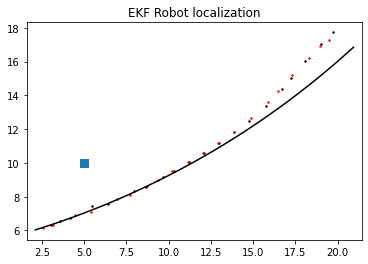

Final P: [0.78122145 2.73277629 0.01663553]


In [ ]:
#landmarks = array([[5, 10],[15, 15],[5, 20],[15, 10]])
landmarks = array([[5, 10]])

ekf = run_localization(landmarks, std_vel=0.1, std_steer=np.radians(1),std_range=0.3, std_bearing=0.1)

print('Final P:', ekf.P.diagonal())

0.017453292519943295